# Data and EDA

In [1]:
import numpy as np
import pandas as pd
import csv
from numpy import NaN
from numpy import array
import matplotlib.pyplot as plt

The original data of CIC-IDS-2017 is many PCAP files. We used the traffic feature extraction tool "CICFlowMeter" to generate some CSV files containing a large number of features and labels. There are five days of data, and we chose Friday, including normal traffic and PortScan attack. [1] [2].

We read and observe the data first.

In [2]:
data=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

In [3]:
data.shape

(286096, 79)

In [4]:
data.head(10)
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,286086,286087,286088,286089,286090,286091,286092,286093,286094,286095
Destination Port,22,22,22,22,35396,22,22,60058,22,22,...,443,53,53,443,443,443,443,443,443,443
Flow Duration,1266342,1319353,160,1303488,77,244,1307239,82,171,210,...,142729,60567,270,144034,142876,196135,378424,161800,142864,186928
Total Fwd Packets,41,41,1,41,1,1,41,1,1,1,...,47,2,2,48,48,49,49,70,50,46
Total Backward Packets,44,44,1,42,2,1,40,2,1,1,...,57,2,2,56,56,57,59,103,62,57
Total Length of Fwd Packets,2664,2664,0,2728,0,0,2728,0,0,0,...,1331,62,62,1313,1319,1331,1325,1427,1331,1319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Idle Std,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Idle Max,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Idle Min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,...,286096.000000,286096.000000,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05
mean,8015.814957,5.386306e+06,3.476305,3.523953,233.703330,2.710754e+03,81.132277,10.360362,24.164366,24.622107,...,1.730720,29.080511,3.413634e+04,2.297963e+04,7.795819e+04,2.174195e+04,1.605051e+06,6.128327e+04,1.649324e+06,1.538278e+06
std,15346.254906,2.193700e+07,19.527596,28.307086,1866.714695,5.101078e+04,327.968919,24.252211,78.429008,117.290777,...,14.906899,8.013593,4.662323e+05,2.624737e+05,7.347312e+05,4.225875e+05,8.687769e+06,1.217802e+06,8.888287e+06,8.566916e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.400000e+01,1.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1108.000000,6.500000e+01,1.000000,1.000000,2.000000,6.000000e+00,2.000000,2.000000,2.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6861.250000,2.382200e+04,2.000000,2.000000,62.000000,1.150000e+02,37.000000,6.000000,34.000000,0.000000,...,1.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65389.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,3412.938776,3541.466551,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


We can see that there are 286111 pieces of data, and the data has 78 features and 1 label.

In [6]:
pd.set_option('display.max_rows', 79)

In [7]:
print(data.dtypes)

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


We can see that all the features are continuous variables, which are inseparable from the work of "CICFlowMeter", so there is no need to go through the steps of dealing with character variables。

In [8]:
count = data[' Label'].value_counts()
count

PortScan    158804
BENIGN      127292
Name:  Label, dtype: int64

In [9]:
percent = data[' Label'].value_counts()/data.shape[0]
percent

PortScan    0.555072
BENIGN      0.444928
Name:  Label, dtype: float64

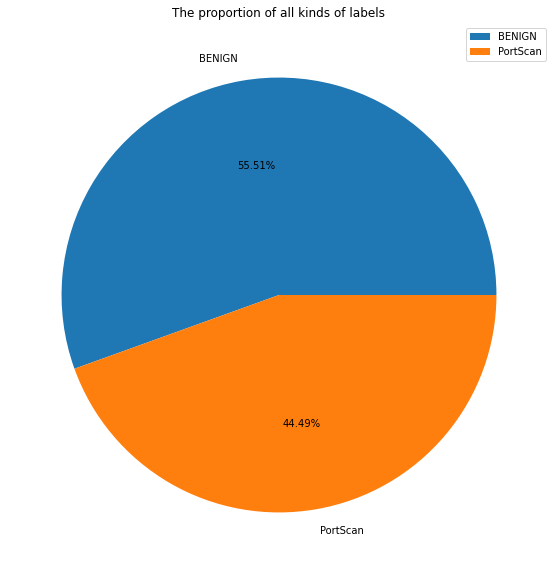

In [10]:
plt.figure(figsize=(10, 10))
plt.pie(count, labels=['BENIGN', 'PortScan'], autopct="%1.2f%%")
plt.legend()
plt.title("The proportion of all kinds of labels")
plt.show()

## Preprocessing

### Missing values and infinite values
We detect missing values。

In [11]:
data1 = data.drop([' Label'],axis=1)

In [12]:
print(np.isnan(data1).any())

 Destination Port               False
 Flow Duration                  False
 Total Fwd Packets              False
 Total Backward Packets         False
Total Length of Fwd Packets     False
 Total Length of Bwd Packets    False
 Fwd Packet Length Max          False
 Fwd Packet Length Min          False
 Fwd Packet Length Mean         False
 Fwd Packet Length Std          False
Bwd Packet Length Max           False
 Bwd Packet Length Min          False
 Bwd Packet Length Mean         False
 Bwd Packet Length Std          False
Flow Bytes/s                    False
 Flow Packets/s                 False
 Flow IAT Mean                  False
 Flow IAT Std                   False
 Flow IAT Max                   False
 Flow IAT Min                   False
Fwd IAT Total                   False
 Fwd IAT Mean                   False
 Fwd IAT Std                    False
 Fwd IAT Max                    False
 Fwd IAT Min                    False
Bwd IAT Total                   False
 Bwd IAT Mea

It is worth noting that there may be infinite values in this dataset, which may cause some subsequent commands to report errors.

In [13]:
print(np.isinf(data1).any())

 Destination Port               False
 Flow Duration                  False
 Total Fwd Packets              False
 Total Backward Packets         False
Total Length of Fwd Packets     False
 Total Length of Bwd Packets    False
 Fwd Packet Length Max          False
 Fwd Packet Length Min          False
 Fwd Packet Length Mean         False
 Fwd Packet Length Std          False
Bwd Packet Length Max           False
 Bwd Packet Length Min          False
 Bwd Packet Length Mean         False
 Bwd Packet Length Std          False
Flow Bytes/s                    False
 Flow Packets/s                 False
 Flow IAT Mean                  False
 Flow IAT Std                   False
 Flow IAT Max                   False
 Flow IAT Min                   False
Fwd IAT Total                   False
 Fwd IAT Mean                   False
 Fwd IAT Std                    False
 Fwd IAT Max                    False
 Fwd IAT Min                    False
Bwd IAT Total                   False
 Bwd IAT Mea

There are no missing and infinite values.

Other conventional data preprocessing will be tried in pyspark. 

## References

[1] [data](https://www.unb.ca/cic/datasets/ids-2017.html)

[2] [Deep learning methods in network intrusion detection: A survey and an
objective comparison](https://scholar.google.co.uk/scholar?q=deep+learning+methods+in+network+intrusion+detection+a+survey+and+an+objective+comparison&hl=zh-CN&as_sdt=0&as_vis=1&oi=scholart)